In [2]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

seed = 7

data = pd.read_csv('data/sepsis_final.csv').drop(['Unnamed: 0', 'SUBJECT_ID', 'HADM_ID'], axis=1)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

X = data.drop(['28 Day Death', 'In Hospital Death'], axis=1)
y = data['28 Day Death']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

In [3]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)

X_train = pd.DataFrame(imp.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imp.transform(X_test), columns=X.columns)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=seed)
clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: " + str(accuracy))

ROC AUC: 0.8170620644658506
Average Precision: 0.7485278409656253
Accuracy: 0.7542062911485004


In [5]:
import importlib
import medical_explainer
importlib.reload(medical_explainer)

<module 'medical_explainer' from '/Users/llja0112/repos/Uni-ACS/medical_explainer.py'>

| Step 1  ==> Calibrating model


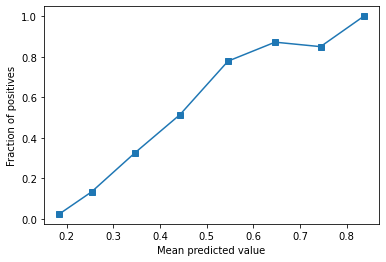

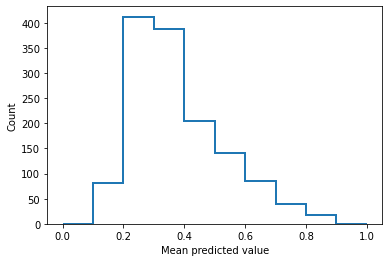

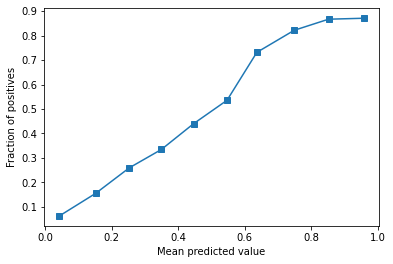

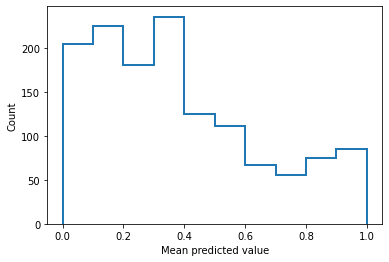

ROC AUC: 0.8170620644658506
Average Precision: 0.7485278409656253
Accuracy: 0.7542062911485004
ROC AUC: 0.8182401022174295
Average Precision: 0.7479062260176795
Accuracy: 0.7585954645208486

| Step 2 ==> Calculate SHAP values

| Step 3 ==> Fit clinical score calculator
Novel fitting


Probability threshold: 0.1
Score threshold: nan

Probability threshold: 0.5
Score threshold: 31.0

Probability threshold: 0.9
Score threshold: 43.0



In [6]:
explainer = medical_explainer.explainer(
    clf, X_train, y_train, X_test, y_test)

explainer.fit(10, shap_method='tree', method='novel', calculator_threshold=0.0001)

In [7]:
explainer.shap_array_list

[[0.10244440536365018, -0.06003115090282701],
 [-0.09236499597269472, 0.1009822132074187],
 [-0.049512872123066994, 0.0973746310701679],
 [-0.05236870978286535, 0.08329337477690327],
 [0.14509391245326067, -0.04016092935360423],
 [0.144147962619924, -0.04106170671653958],
 [-0.0715908771015987, 0.048764574281124566],
 [-0.04107152998346943, 0.06868740891298589],
 [-0.035287181981555046, 0.05782921466404987],
 [-0.0428800321354095, 0.03231058152721062]]

In [8]:
explainer.score_array_list

[array([ 3., -2.]),
 array([-3.,  3.]),
 array([-2.,  3.]),
 array([-2.,  3.]),
 array([ 4., -1.]),
 array([ 4., -1.]),
 array([-2.,  2.]),
 array([-1.,  2.]),
 array([-1.,  2.]),
 array([-1.,  1.])]

In [9]:
explainer.variables

array(['LOS', 'RDW', 'Uric Acid', 'Vitamin B12', 'Haptoglobin',
       'Fibrinogen, Functional', 'inotropes', 'Phosphate',
       'Potassium, Whole Blood', 'Age'], dtype=object)

In [10]:
explainer.breakpoints_list

[[-0.3222222222222222, 7.69644053360476, 294.66041666666666],
 [11.6, 15.465075087831034, 30.5],
 [-2.432555133552171, 6.689696120145441, 28.208716694731578],
 [-1341.0715789248188, 1117.4813486269638, 3360.5512931207286],
 [-151.44629140606094, 141.89626774582285, 688.0],
 [0.0, 354.65992462018346, 1773.0],
 [0.0, 0.7504006020872686, 3.0],
 [0.2, 3.812962908661292, 17.3],
 [1.9, 4.286256768476629, 11.2],
 [18.258726899383984, 65.92482217875002, 90.0]]

In [11]:
scores,probs,predictions = explainer.predict_calculator(X_test, 1)

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

# accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

# print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions))


ROC AUC: 0.7503092349097895
Average Precision: 0.6578866748307198
Accuracy: 0.6656912948061449
[[820  24]
 [433  90]]
